<a href="https://colab.research.google.com/github/MeghaManojM/FinalProject-/blob/main/DDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install dlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import sys
from google.colab import output

gDrivePath = "/content/drive/MyDrive/Colab_Notebooks/Drowsiness_Detection"
sys.path.append(gDrivePath)

In [20]:
from utils import video_stream
from utils import video_frame
from utils import js_to_image
from utils import Resize

import dlib
from google.colab.patches import cv2_imshow
from IPython.display import Audio

from scipy.spatial import distance as dist
from threading import Thread
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import time
import cv2


In [21]:
dlib_shape_predict = "/content/drive/MyDrive/Colab_Notebooks/Drowsiness_Detection/dlib_shape_predictor/shape_predictor_68_face_landmarks.dat"

In [27]:
image_array = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Drowsiness_Detection/EYEData/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

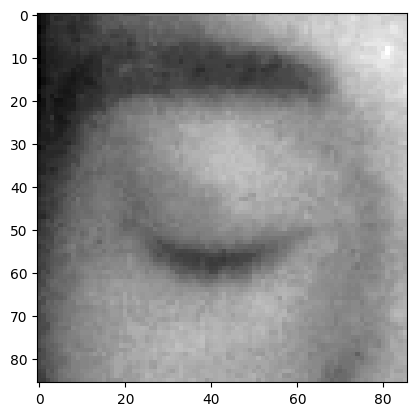

In [28]:
plt.imshow(image_array, cmap="gray")


In [29]:
image_array.shape


(86, 86)

In [30]:
import os


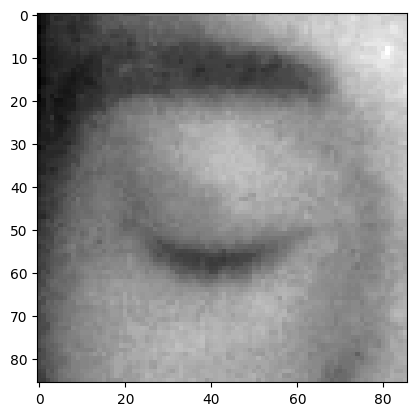

In [31]:
Datadirectory = '/content/drive/MyDrive/Colab_Notebooks/Drowsiness_Detection/EYEData/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

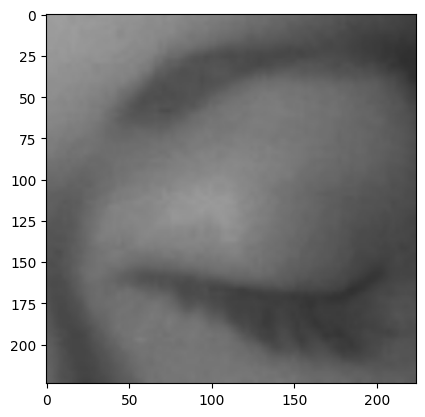

In [32]:
image_size = 224
new_arr = cv2.resize(backtorgb, (image_size,image_size))
plt.imshow(new_arr, cmap="gray")
plt.show()

In [33]:
FACE_REGION_INDEXES = OrderedDict([
    ("mouth", (48,68)),
    ("inner_mouth", (60,68)),
    ("right_eyebrow", (17,22)),
    ("left_eyebrow", (22,27)),
    ("right_eye", (36,42)),
    ("left_eye", (42,48)),
    ("nose", (27,36)),
    ("jaw", (0,17))
])

In [35]:
train_data = []

def create_train_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_no = Classes.index(category)
      for img in os.listdir(path):
        try :
           image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (image_size,image_size))
           train_data.append([new_arr, class_no])
        except Exception as e:
          pass

In [36]:
create_train_data()
print(len(train_data))

4000


In [37]:
import random
random.shuffle(train_data)

In [38]:
X = []
y = []
for features, label in train_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, image_size, image_size, 3)

In [39]:
X.shape


(4000, 224, 224, 3)

In [40]:
X = X/255.0


In [41]:
Y = np.array(y)


In [42]:
def shape_to_np_array(shape, dtype="int"):
	
	coordinates = np.zeros((shape.num_parts, 2), dtype=dtype)

	for i in range(0, shape.num_parts):
		coordinates[i] = (shape.part(i).x, shape.part(i).y)

	return coordinates

In [43]:
def eye_aspect_ratio(eye):
	A = dist.euclidean(eye[1], eye[5])
	B = dist.euclidean(eye[2], eye[4])
	C = dist.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [44]:
EYE_EAR_THRESHOLD = 0.25
EYE_EAR_CONSECU_FRAMES = 5

COUNTER = 0
ALARM_ON = False

print("Facial landmark predictor Loading...")
face_detector = dlib.get_frontal_face_detector()
facial_landmark_predictor = dlib.shape_predictor(dlib_shape_predict)

Facial landmark predictor Loading...


In [45]:
(lfteyeStart, lfteyeEnd) = FACE_REGION_INDEXES["left_eye"]
(rgteyeStart, rgteyeEnd) = FACE_REGION_INDEXES["right_eye"]

In [46]:
def run():
    while True:
        output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
        global stop_threads
        if stop_threads:
            break

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
model = tf.keras.applications.mobilenet.MobileNet()


In [49]:
model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [50]:
base_input = model.layers[0].input
base_output = model.layers[-4].output


In [51]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [52]:
new_model = keras.Model(inputs = base_input, outputs = final_output)


In [53]:
new_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [54]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [55]:
History = new_model.fit(X,Y, epochs = 10, validation_split = 0.1)


Epoch 1/10
113/113 [==============================] - 815s 7s/step - loss: 0.7491 - accuracy: 0.5156 - val_loss: 1.7617 - val_accuracy: 0.4725
Epoch 2/10
113/113 [==============================] - 795s 7s/step - loss: 0.7335 - accuracy: 0.5050 - val_loss: 0.8639 - val_accuracy: 0.4725
Epoch 3/10
113/113 [==============================] - 795s 7s/step - loss: 0.7110 - accuracy: 0.4903 - val_loss: 0.6924 - val_accuracy: 0.5275
Epoch 4/10
113/113 [==============================] - 796s 7s/step - loss: 0.7057 - accuracy: 0.5103 - val_loss: 0.7003 - val_accuracy: 0.4725
Epoch 5/10
113/113 [==============================] - 797s 7s/step - loss: 0.7098 - accuracy: 0.4908 - val_loss: 0.6948 - val_accuracy: 0.5275
Epoch 6/10
113/113 [==============================] - 792s 7s/step - loss: 0.7184 - accuracy: 0.4961 - val_loss: 0.7301 - val_accuracy: 0.4725
Epoch 7/10
113/113 [==============================] - 789s 7s/step - loss: 0.7081 - accuracy: 0.5058 - val_loss: 0.7023 - val_accuracy: 0.4725

[0.5155555605888367, 0.5049999952316284, 0.4902777671813965, 0.5102777481079102, 0.4908333420753479, 0.496111124753952, 0.5058333277702332, 0.5061110854148865, 0.49416667222976685, 0.4891666769981384]


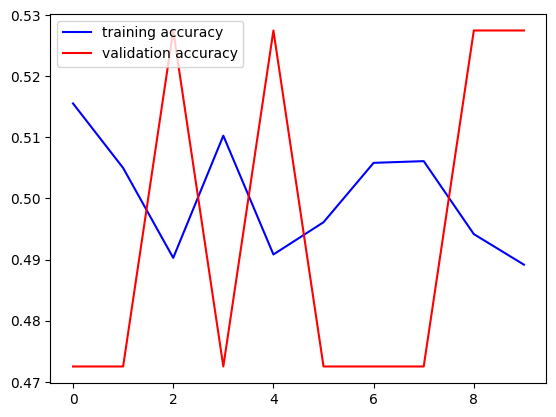

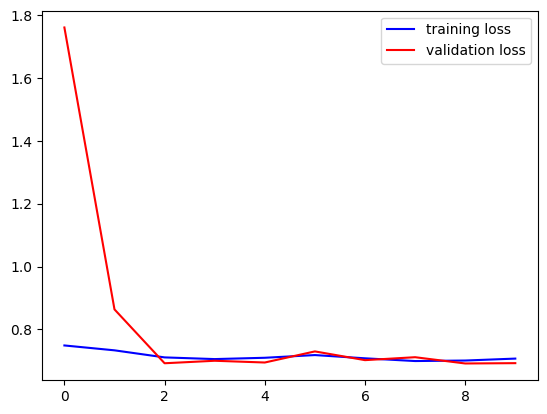

In [56]:
accuracy = History.history['accuracy']
val_accuracy = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))
print(accuracy)
plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [34]:
new_model.save('my_newmodel.h5')


In [35]:
new_model = tf.keras.models.load_model('my_newmodel.h5')


Starting video stream thread...


<IPython.core.display.Javascript object>

Drowsiness Alert..


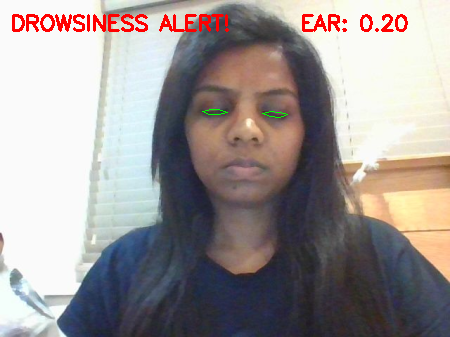

Drowsiness Alert..


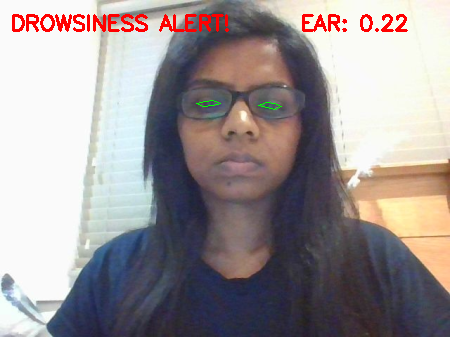

Drowsiness Alert..


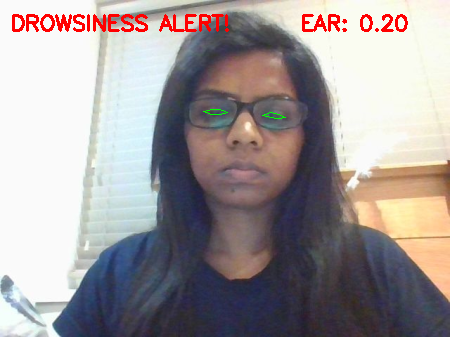

Drowsiness Alert..


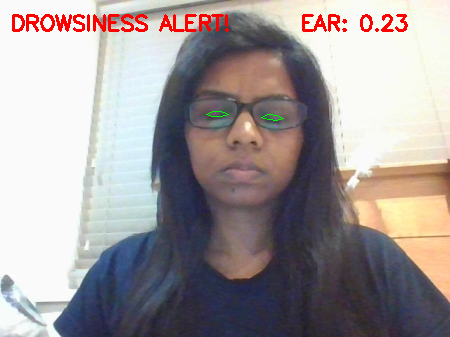

Drowsiness Alert..


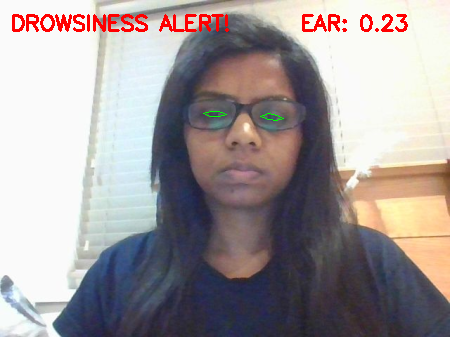

TypeError: ignored

In [37]:
# Starting the video stream thread
print("Starting video stream thread...")
video_stream()
label_html = 'Capturing...'
bbox = ''
time.sleep(1.0)
COUNTER=0
ALARM_ON = False

# Looping over the frames from the video stream
while True:

	# On each frame of the video file stream, resizing it, and converting it to grayscale
	vs = video_frame(label_html, bbox)
	frame = js_to_image(vs["img"])
	frame = Resize(frame, width=450)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
	# Detecting faces using dlib detector in the grayscale frame
	rects = face_detector(gray, 0)
 
	# Looping over the face detections
	for rect in rects:

		# Extracting the facial landmarks from the face region, then converting the facial landmarks (x,y) coordinates to a NumPy array
		shape = facial_landmark_predictor(gray, rect)
		shape = shape_to_np_array(shape)
	
		# Extracting the left and right eye coordinates to compute the eye aspect ratio for both the eyes
		leftEye = shape[lfteyeStart:lfteyeEnd]
		rightEye = shape[rgteyeStart:rgteyeEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
	
		# Calculating the average of the eye aspect ratio together for both eyes
		ear = (leftEAR + rightEAR) / 2.0
    
  
  	# Verifying if the eye aspect ratio is below the blink threshold, if so then incrementing the blink frame counter
		if ear < EYE_EAR_THRESHOLD:
			COUNTER += 1

			# If the eyes are closed for a sufficient number of frames then sound the alarm
			if COUNTER >= EYE_EAR_CONSECU_FRAMES:

				# If the alarm is not on, then switch it on
				if not ALARM_ON:
					ALARM_ON = True

					# Initializing the stop thread to false
					stop_threads = False

					# Running the run method on a separate thread to play the alarm
					t = Thread(target=run)
					print("Drowsiness Alert..")
					t.deamon = True
					t.start()
					
					# Stopping and killing the thread after playing the sound
					stop_threads = True
					t.join()

					# Initializing the counter and alarm_on indicator back to initial state
					COUNTER = 0
					ALARM_ON = False

					# Computing the convex hull for the left and right eye, then visualizing both the eyes
					leftEyeHull = cv2.convexHull(leftEye)
					rightEyeHull = cv2.convexHull(rightEye)
					cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
					cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
		 
					# Drawing an alarm and printing EAR on the screenshot
					cv2.putText(frame, "DROWSINESS ALERT!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
					cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
		 
					# show the frame
					cv2_imshow(frame)
		 
		# or else, the eye aspect ratio is not below the blink threshold, so reset the counter and alarm
		else:
			COUNTER = 0
			ALARM_ON = False

	key = cv2.waitKey(1) & 0xFF
 
	# If the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()